<a href="https://colab.research.google.com/github/pushkar-hue/numpy-digit-net/blob/main/numpy_digit_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("oddrationale/mnist-in-csv")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-in-csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv(path + "/mnist_train.csv")
df_test = pd.read_csv(path + "/mnist_test.csv")

df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [ ]:
data_train = df_train.to_numpy().T
data_test = df_test.to_numpy().T

data_train.shape, data_test.shape

((785, 60000), (785, 10000))

In [ ]:
data_train = data_train[:, :10000]
data_test = data_test[:, :2000]

data_train.shape, data_test.shape

((785, 10000), (785, 2000))

In [ ]:
X_train, Y_train = data_train[1:, :], data_train[0, :]
X_test, Y_test = data_test[1:, :], data_test[0, :]
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((784, 10000), (784, 2000), (10000,), (2000,))

In [ ]:
x = np.random.randn(784, 10)
x[1]

array([ 0.664926  , -0.78287108, -1.02672679, -1.28193777,  0.32758091,
        1.21877244,  0.79271578, -2.17087597, -1.09128951, -0.72527561])

In [ ]:
def initialize_parameters():
    W1 = np.random.randn(128, 784) * np.sqrt(2.0/784)  # Larger hidden layer
    B1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * np.sqrt(2.0/128)
    B2 = np.zeros((10, 1))
    return W1, B1, W2, B2


In [ ]:
def Relu(Z):
  return np.maximum(Z, 0)

In [ ]:
def softmax(Z):
  Z_stable = Z - np.max(Z, axis=0, keepdims=True)
  exp_Z = np.exp(Z_stable)
  return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)


In [ ]:
def forward_prop(W1, B1, W2, B2, X):
  Z1 = np.dot(W1, X) + B1
  A1 = Relu(Z1)
  Z2 = np.dot(W2, A1) + B2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

In [ ]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

In [ ]:
def deriv_Relu(Z):
  return Z > 0

In [ ]:
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
  m = Y.size
  one_hot_Y = one_hot(Y)
  d_z2 = A2 - one_hot_Y
  d_w2 = 1 / m * np.dot(d_z2, A1.T)
  d_b2 = 1 / m * np.sum(d_z2, axis=1, keepdims=True)
  d_z1 = np.dot(W2.T, d_z2) * deriv_Relu(Z1)
  d_w1 = 1 / m * np.dot(d_z1, X.T)
  d_b1 = 1 / m * np.sum(d_z1, axis=1, keepdims=True)
  return d_w1, d_b1, d_w2, d_b2

In [ ]:
def update_params(W1, B1, W2, B2, d_w1, d_b1, d_w2, d_b2, alpha):
  W1 = W1 - alpha * d_w1
  B1 = B1 - alpha * d_b1
  W2 = W2 - alpha * d_w2
  B2 = B2 - alpha * d_b2
  return W1, B1, W2, B2

In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)

In [ ]:
def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

In [ ]:
def compute_loss(A2, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    return -np.sum(one_hot_Y * np.log(A2 + 1e-8)) / m  # +1e-8 for stability

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, B1, W2, B2 = initialize_parameters()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X_train)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

        if i % 50 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            loss = compute_loss(A2, Y)
            print(f"Iteration {i}: Acc={acc:.4f}, Loss={loss:.4f}")

    return W1, B1, W2, B2

In [ ]:
W1, B1, W2, B2 = gradient_descent(X_train, Y_train, 0.01, 600)

Iteration 0: Acc=0.0903, Loss=2.4173
Iteration 50: Acc=0.5150, Loss=1.8888
Iteration 100: Acc=0.6805, Loss=1.5262
Iteration 150: Acc=0.7399, Loss=1.2543
Iteration 200: Acc=0.7765, Loss=1.0619
Iteration 250: Acc=0.8017, Loss=0.9259
Iteration 300: Acc=0.8175, Loss=0.8272
Iteration 350: Acc=0.8297, Loss=0.7532
Iteration 400: Acc=0.8403, Loss=0.6960
Iteration 450: Acc=0.8490, Loss=0.6506
Iteration 500: Acc=0.8572, Loss=0.6138
Iteration 550: Acc=0.8626, Loss=0.5832


In [ ]:
def make_predictions(X, W1, B1, W2, B2):
  _, _, _, A2 = forward_prop(W1, B1, W2, B2, X)
  predictions = get_predictions(A2)
  return predictions

In [ ]:
def test_prediction(index, W1, B1, W2, B2):
  current_image = X_test[:, index, None]
  prediction = make_predictions(current_image, W1, B1, W2, B2)
  label = Y_test[index]
  print("Prediction: ", prediction)
  print("Label: ", label)

  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [8]
Label:  8


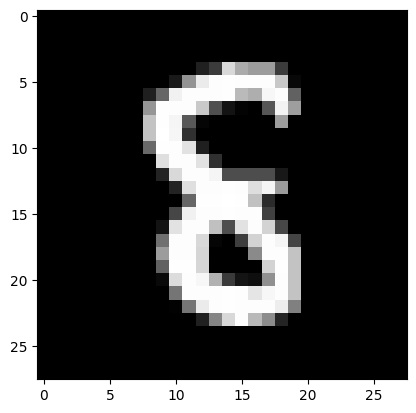

In [ ]:
test_prediction(232, W1, B1, W2, B2)